In [1]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA ISPU - Normalization.xlsx", sheet_name="DKI1")
X_train = DKI1.index.values.reshape(-1, 1)
y_train = DKI1['PM10'].values.reshape(-1,)

# Train KELMOR on the dataset
gamma_value = 0.02
kelmor = KELMOR(C=100, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

In [2]:
# Menampilkan min dan max partikel
min_par = DKI1['PM10'].min()
max_par = DKI1['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

print("Nilai maksimum Partikel :", max_par)
print("Nilai minimum Partikel :", min_par)

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

print("Nilai maks denorm Partikel :", X_train_denorm)
print("Nilai min denorm Partikel :", prediksi_denorm)

Nilai maksimum Partikel : 1.0
Nilai minimum Partikel : 0.0
Nilai maks denorm Partikel : [71.95121951 14.63414634 17.07317073 ... 31.70731707 56.09756098
 54.38464499]
Nilai min denorm Partikel : [53.65853659 53.65853659 53.65853659 53.65853659 53.65853659 52.43902439
 52.43902439 52.43902439 52.43902439 52.43902439 51.2195122  51.2195122
 51.2195122  51.2195122  51.2195122  51.2195122  50.         50.
 50.         50.         50.         50.         50.         50.
 49.75609756 49.75609756 49.75609756 49.75609756 49.75609756 49.75609756]


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print(result_df)
print("\nEvaluation Metrics:")
print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)
print("R-Squared: ", r2)

       Tanggal       PM10
0   2022-12-31  53.658537
1   2023-01-01  53.658537
2   2023-01-02  53.658537
3   2023-01-03  53.658537
4   2023-01-04  53.658537
5   2023-01-05  52.439024
6   2023-01-06  52.439024
7   2023-01-07  52.439024
8   2023-01-08  52.439024
9   2023-01-09  52.439024
10  2023-01-10  51.219512
11  2023-01-11  51.219512
12  2023-01-12  51.219512
13  2023-01-13  51.219512
14  2023-01-14  51.219512
15  2023-01-15  51.219512
16  2023-01-16  50.000000
17  2023-01-17  50.000000
18  2023-01-18  50.000000
19  2023-01-19  50.000000
20  2023-01-20  50.000000
21  2023-01-21  50.000000
22  2023-01-22  50.000000
23  2023-01-23  50.000000
24  2023-01-24  49.756098
25  2023-01-25  49.756098
26  2023-01-26  49.756098
27  2023-01-27  49.756098
28  2023-01-28  49.756098
29  2023-01-29  49.756098

Evaluation Metrics:
RMSE:  0.12399329915357347
MSE:  0.015374338234987564
MAE:  0.10006077148289433
R-Squared:  0.08679073227790735


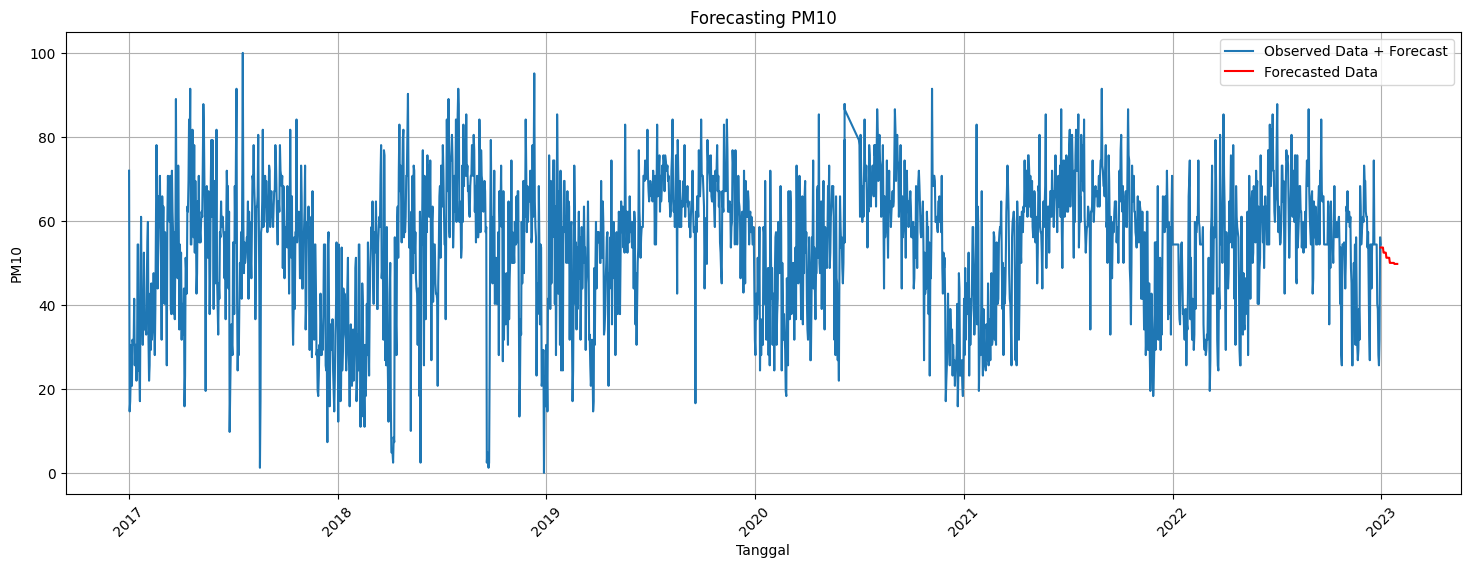

In [4]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


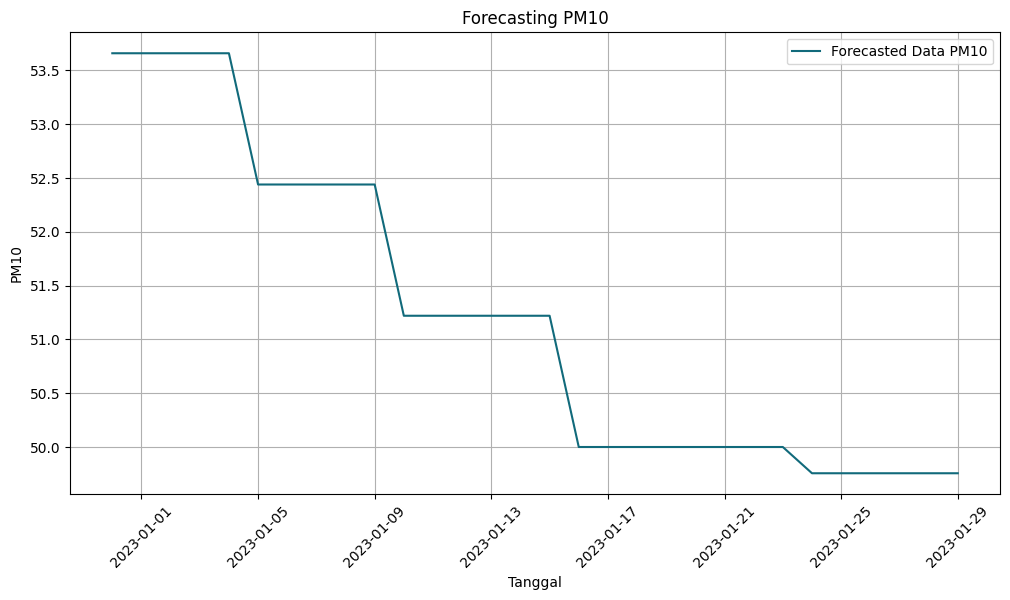

In [5]:

plt.figure(figsize=(12, 6))
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data PM10', color='#116A7B')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()